In [ ]:
#Checking which GPU is alloted
!nvidia-smi

Tue Jun 22 05:10:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    78W / 149W |    122MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Statement to import files from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import statements
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random

In [ ]:
#Checkinh if GPU is being utilized
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Location of leaves in gDrive
DIRECTORY=r"/content/drive/MyDrive/CNN_leaves"
#Names of species list
CATEGORIES=["Anhui Barberry","Beale's barberry","Big-fruited Holly","camphortree","Canadian poplar",
           "castor aralia","Chinese cinnamon","Chinese horse chestnut","Chinese redbud",
            "Chinese Toon","Chinese tulip tree","Crape myrtle","deodar","Ford Woodlotus",
           "ginkgo, maidenhair tree","Glossy Privet","goldenrain tree","Japan Arrowwood",
           "Japanese cheesewood","Japanese Flowering Cherry","Japanese maple","Nanmu","oleander",
           "peach","pubescent bamboo","southern magnolia","sweet osmanthus","tangerine",
            "trident maple","true indigo","wintersweet","yew plum pine"]

In [ ]:
#Reading every file i.e. leaves images
for category in CATEGORIES:
    folder=os.path.join(DIRECTORY, category)
    print(folder)
    
    for img in os.listdir(folder):
        img=os.path.join(folder, img)
        print(img)

/content/drive/MyDrive/CNN_leaves/Anhui Barberry
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1605.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1586.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1563.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1596.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1579.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1592.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1609.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1553.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1600.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1577.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1581.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1589.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1594.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1559.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1555.jpg
/content/drive/MyDrive/CNN_leaves/Anhui Barberry/1593.jpg
/content/drive/MyDrive/

In [ ]:
#Storing the images as numpy arrays of intensity values of every pixel 
#size reduced to 300x300 from 1600x1200
#storing these values in list named data which also allocates index numbers to every leaf species
data=[]
for category in CATEGORIES:
    folder=os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    
    for img in os.listdir(folder):
        img=os.path.join(folder, img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(300,300))
        data.append([img_arr,label])
        
        #plt.imshow(img_arr)

In [ ]:
#Printing array
data

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [ ]:
# To mix images - done to avoid bias in the model
random.shuffle(data)

In [ ]:
#separate images ansd labels to start training
X=[]
y=[]

for feature, label in data:
    X.append(feature)
    y.append(label)

In [ ]:
X=np.array(X)  #images array
y=np.array(y)  # labels array of corresponding images

In [ ]:
X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [ ]:
#Feature scaling to make model faster - all intensities are from 0-1 now
X=X/255

In [ ]:
X

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [ ]:
# to cross check all images are taken
X.shape
#We get 1907 as the 1st dimension = number of images
#300 and 300 are the dimension of every image
# 3 is the no of dimensions for R, G and B channels.

(1907, 300, 300, 3)

# Building the CNN model

In [ ]:
#Import statements for training
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation

In [ ]:
#CNN model
model=Sequential()
model.add(Conv2D(128,(5,5), input_shape=X.shape[1:], activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5), input_shape=X.shape[1:], activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), input_shape=X.shape[1:], activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #backpropagation

In [ ]:
#training
model.fit(X,y, epochs=50, validation_split=0.1)

Epoch 1/50
54/54 [==============================] - 68s 585ms/step - loss: 2.2215 - accuracy: 0.3893 - val_loss: 1.3895 - val_accuracy: 0.5654
Epoch 2/50
54/54 [==============================] - 22s 405ms/step - loss: 0.8451 - accuracy: 0.7348 - val_loss: 1.1938 - val_accuracy: 0.7068
Epoch 3/50
54/54 [==============================] - 22s 404ms/step - loss: 0.5029 - accuracy: 0.8339 - val_loss: 0.7849 - val_accuracy: 0.8063
Epoch 4/50
54/54 [==============================] - 22s 404ms/step - loss: 0.3578 - accuracy: 0.8782 - val_loss: 0.7532 - val_accuracy: 0.8168
Epoch 5/50
54/54 [==============================] - 22s 405ms/step - loss: 0.2076 - accuracy: 0.9336 - val_loss: 0.7234 - val_accuracy: 0.8168
Epoch 6/50
54/54 [==============================] - 22s 405ms/step - loss: 0.1548 - accuracy: 0.9464 - val_loss: 0.8077 - val_accuracy: 0.7958
Epoch 7/50
54/54 [==============================] - 22s 404ms/step - loss: 0.1184 - accuracy: 0.9592 - val_loss: 0.7965 - val_accuracy: 0.8534

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 128)     9728      
_________________________________________________________________
average_pooling2d (AveragePo (None, 148, 148, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 64)      204864    
_________________________________________________________________
average_pooling2d_1 (Average (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 32)        18464     
_________________________________________________________________
average_pooling2d_2 (Average (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0

In [ ]:
# saving current model
model.save('/content/drive/MyDrive/classifier.pt')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/classifier.pt/assets


# Testing

We have augmented some of the images in our dataset and used them for testing.
Augmentation includes laterally flipping the image and rotating it.

In [ ]:
from keras.preprocessing import image

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
Anhui Barberry


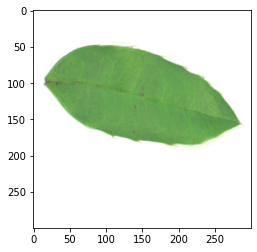

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/7.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0.]]
true indigo


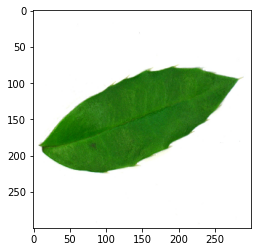

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/1.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

Wrong Prediction in the above image, it should belong to class 1 - Anhui Barberry

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
Beale's barberry


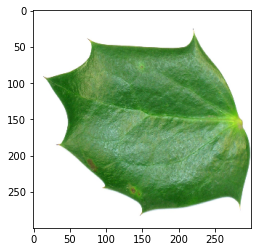

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/2.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
camphortree


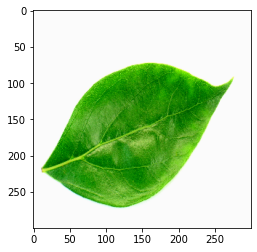

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/4.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
ginkgo, maidenhair tree


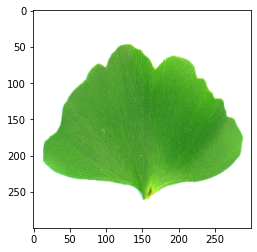

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/15.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
Canadian poplar


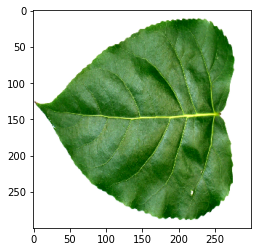

In [ ]:
test_path = r"/content/drive/MyDrive/CNN_test"

# for i in - multiple images tested 
img_pred=image.load_img(test_path+"/5.jpg", target_size=(300,300))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result=model.predict(img_pred)
print(result)

for i in range(0,32):
    if(result[0][i]==1):
        print(CATEGORIES[i])

5 out of the above 6 images are correctly classified, thus our CNN model does a good job in correctly classifying the leaves according to their species.